In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

In [5]:
data = mogptk.Data()
data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x), n=20, start=0.0, end=4.0, var=0.03, name='A')
#data.add_function(lambda x: np.sin(6*x)+2, n=20, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

print(data)

Input dims: 2
Output dims: 1
X: [array([[2.386, 3.077],
       [2.807, 3.347],
       [3.244, 4.519],
       [3.559, 4.009],
       [3.009, 4.738],
       [4.742, 1.381],
       [3.59 , 4.033],
       [2.333, 2.417],
       [4.55 , 1.416],
       [3.721, 4.239],
       [4.038, 2.354],
       [2.978, 4.009],
       [1.587, 1.08 ],
       [4.48 , 1.089],
       [2.31 , 2.732],
       [3.673, 4.278],
       [2.242, 3.036],
       [3.843, 3.121],
       [1.651, 1.157],
       [2.353, 1.274],
       [3.085, 1.214],
       [2.04 , 3.153],
       [3.887, 1.663],
       [2.906, 4.922],
       [4.01 , 4.713],
       [3.31 , 4.594],
       [2.985, 1.679],
       [4.637, 0.956],
       [3.093, 3.828],
       [2.758, 0.643],
       [3.319, 4.864],
       [1.754, 2.672],
       [2.639, 1.755],
       [3.946, 1.107],
       [4.367, 1.377],
       [4.713, 1.302]])]
Y: [array([1.74 , 1.61 , 1.145, 4.02 , 0.45 , 0.86 , 2.08 , 1.435, 1.74 ,
       0.28 , 2.805, 0.56 , 0.605, 0.555, 0.735, 1.015, 0.725, 

In [14]:
data = mogptk.Data()


print(data)

Input dims: 1
Output dims: 1
X: [array([[0.20647864],
       [0.37210706],
       [0.61650856],
       [0.6824742 ],
       [0.71679032],
       [0.90996628],
       [1.02724339],
       [1.0630648 ],
       [1.27709344],
       [1.54658085],
       [1.5992953 ],
       [1.95719346]])]
Y: [array([ 0.96150247,  0.75671519, -0.46834969, -0.83477899, -0.88112515,
       -0.73341484, -0.13625935,  0.12475722,  1.0297571 ,  0.14122791,
       -0.18105696, -0.81030316])]


In [6]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

[{'mixture_weights': 0.7062311429632235,
  'mixture_means': array([0.0979173, 1.1409216]),
  'mixture_scales': array([1.32812164, 0.81743973])},
 {'mixture_weights': 0.7162369405266349,
  'mixture_means': array([0.72255364, 0.65166962]),
  'mixture_scales': array([0.52409965, 1.44260712])},
 {'mixture_weights': 0.8921474241522266,
  'mixture_means': array([1.38344544, 0.03605357]),
  'mixture_scales': array([0.48515976, 1.95093957])}]

In [ ]:
sm.init_params()
display(sm.get_params())

In [ ]:
sm.fix_params('mixture_weights')
display(sm.get_params())

In [7]:
sm.train()
display(sm.get_params())

Building...
3 2 (3,) (3, 2) (2, 3)
Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 44.301618
  Number of iterations: 45
  Number of functions evaluations: 64
Done


[{'mixture_weights': 0.08509349934047235,
  'mixture_means': array([1.26319875e-04, 1.02165497e-06]),
  'mixture_scales': array([1.00417970e-06, 1.61092609e+00])},
 {'mixture_weights': 1.3307859519683984,
  'mixture_means': array([1.00000535e-06, 3.67594901e-06]),
  'mixture_scales': array([2.44985525e-02, 1.82837414e-06])},
 {'mixture_weights': 1.0027250841546152e-06,
  'mixture_means': array([1.02047070e-06, 2.39277338e-02]),
  'mixture_scales': array([10.5211578 ,  0.04680996])}]

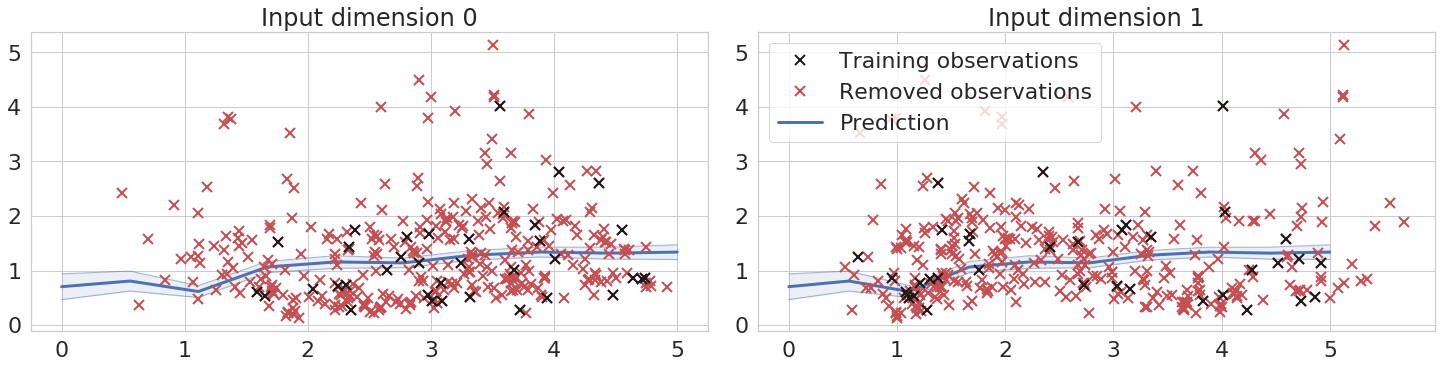

In [8]:
sm.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=10)
sm.predict()
mogptk.plot(sm)

## MOSM

In [9]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

[{'magnitude': array([-0.42586072]), 'mean': array([[-0.76544495],
         [ 0.97093436]]), 'variance': array([[0.16912957],
         [0.89277203]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.39147343])},
 {'magnitude': array([0.21064698]), 'mean': array([[-0.67734431],
         [-0.58653358]]), 'variance': array([[0.63376057],
         [0.49926061]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.56378265])},
 {'magnitude': array([2.19466079]), 'mean': array([[ 0.49331635],
         [-0.77493989]]), 'variance': array([[0.99324349],
         [0.42546919]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.25032673])}]

In [ ]:
mosm.estimate_means()
display(mosm.get_params())

In [ ]:
mosm.estimate()
display(mosm.get_params())

In [14]:
mosm.train()
display(mosm.get_params())

Building...
(36, 1) (36, 2)
(36, 1) (36, 3)
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 43.815114
  Number of iterations: 103
  Number of functions evaluations: 131
Done


[{'magnitude': array([-2.1896581e-06]), 'mean': array([[-1.83024218],
         [ 2.78625319]]), 'variance': array([[0.42846545],
         [1.91570219]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([1.e-06])},
 {'magnitude': array([3.35571201e-05]), 'mean': array([[ 0.25959466],
         [-0.07578349]]), 'variance': array([[0.59279982],
         [0.5425506 ]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([1.e-06])},
 {'magnitude': array([25.20603757]), 'mean': array([[-0.12642339],
         [ 0.52955597]]), 'variance': array([[9.33485934e-02],
         [1.39986861e-06]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([1.00000042e-06])}]

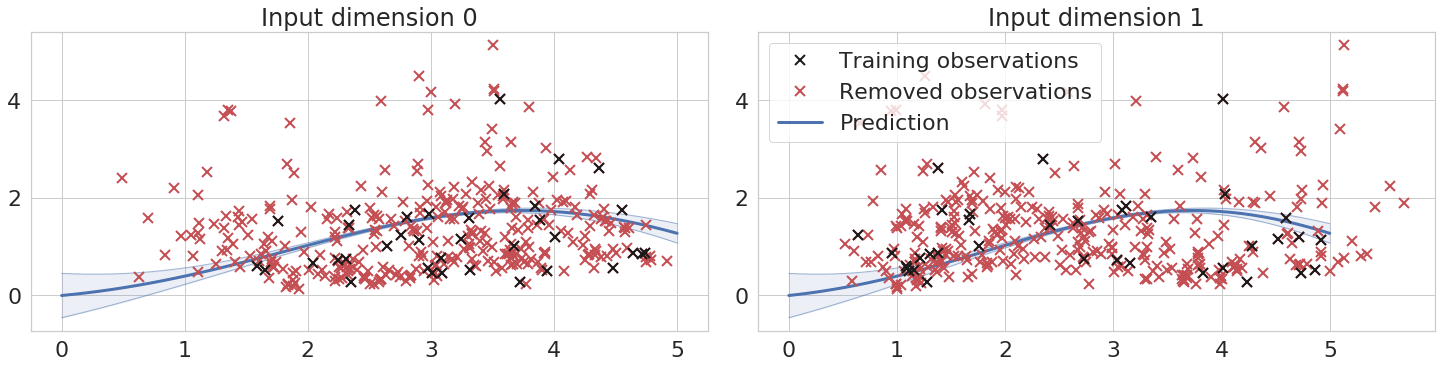

In [16]:
mosm.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=50)
mosm.predict()
mogptk.plot(mosm)

## SM-LMC

In [17]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

[{'constant': array([[-0.91414125]]),
  'mean': array([0.81679902, 0.96388546]),
  'variance': array([0.8996365 , 0.72310407])},
 {'constant': array([[-1.14824085]]),
  'mean': array([0.33677439, 0.43867332]),
  'variance': array([0.24494246, 0.98327448])},
 {'constant': array([[1.43462844]]),
  'mean': array([0.29976486, 0.73623384]),
  'variance': array([0.04092039, 0.80800638])}]

In [ ]:
smlmc.estimate()
display(smlmc.get_params())

In [18]:
smlmc.train()
display(smlmc.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 44.459905
  Number of iterations: 44
  Number of functions evaluations: 46
Done


[{'constant': array([[4.21672538e-06]]),
  'mean': array([0.63240519, 0.57675267]),
  'variance': array([0.76888811, 0.63028605])},
 {'constant': array([[0.00034336]]),
  'mean': array([0.12763558, 0.04130315]),
  'variance': array([0.11504116, 0.01995135])},
 {'constant': array([[0.98765309]]),
  'mean': array([1.63127265e-02, 4.76340559e-06]),
  'variance': array([0.10393492, 0.17518845])}]

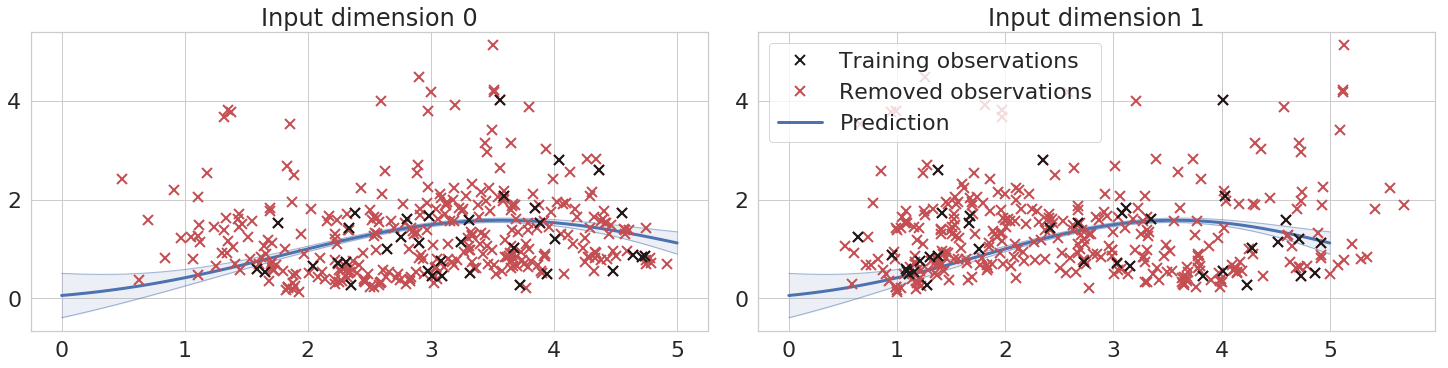

In [19]:
smlmc.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=50)
smlmc.predict()
mogptk.plot(smlmc)

## CSM

In [20]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

[{'constant': array([[0.12905736]]),
  'mean': array([0.94645934, 0.56658353]),
  'variance': array([0.99637572, 0.66519455]),
  'phase': array([[0.]])},
 {'constant': array([[0.93557825]]),
  'mean': array([0.30147541, 0.36959985]),
  'variance': array([0.80342393, 0.20702366]),
  'phase': array([[0.]])},
 {'constant': array([[0.63852189]]),
  'mean': array([0.34330332, 0.71514235]),
  'variance': array([0.11081399, 0.76871324]),
  'phase': array([[0.]])}]

In [ ]:
csm.estimate()
display(csm.get_params())

In [21]:
csm.train()
display(csm.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 44.329270
  Number of iterations: 66
  Number of functions evaluations: 84
Done


[{'constant': array([[1.e-06]]),
  'mean': array([1.e-06, 1.e-06]),
  'variance': array([1.e-06, 1.e-06]),
  'phase': array([[1.e-06]])},
 {'constant': array([[0.17895547]]),
  'mean': array([1.e-06, 1.e-06]),
  'variance': array([8.52155097e-01, 1.51246921e-06]),
  'phase': array([[1.e-06]])},
 {'constant': array([[0.8052548]]),
  'mean': array([1.e-06, 1.e-06]),
  'variance': array([1.00000000e-06, 2.00514275e-01]),
  'phase': array([[1.e-06]])}]

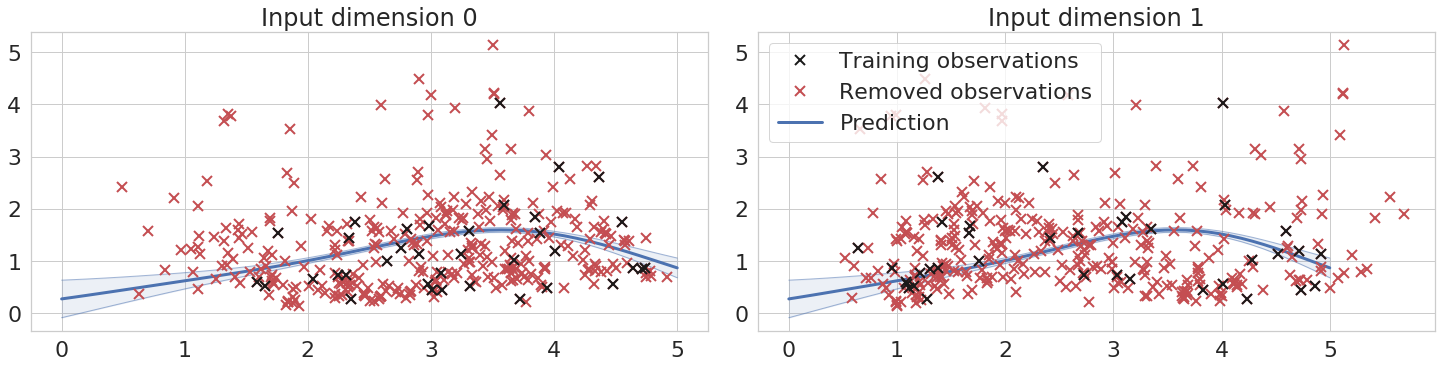

In [22]:
csm.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=50)
csm.predict()
mogptk.plot(csm)

## CG

In [23]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

[{'constant': array([0.91949721]), 'variance': array([[0.33427599],
         [0.94173923]])},
 {'constant': array([0.73856711]), 'variance': array([[0.10693297],
         [0.29693977]])},
 {'constant': array([0.53996961]), 'variance': array([[0.07603679],
         [0.92099573]])}]

In [28]:
cg.init_params()
display(cg.get_params())

ValueError: operands could not be broadcast together with shapes (72,72) (36,36) 

In [24]:
cg.train()
display(cg.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 44.329270
  Number of iterations: 75
  Number of functions evaluations: 92
Done


[{'constant': array([0.42299035]), 'variance': array([[8.5197915e-01],
         [1.0000000e-06]])},
 {'constant': array([0.89738267]), 'variance': array([[1.03863851e-06],
         [2.00502149e-01]])},
 {'constant': array([9.4263853e-05]), 'variance': array([[0.07705026],
         [9.29906136]])}]

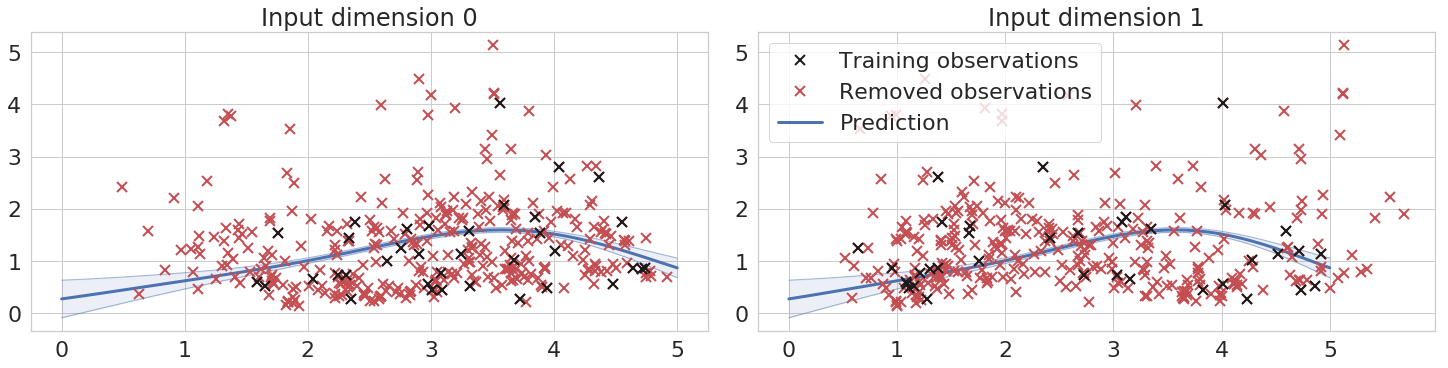

In [25]:
cg.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=50)
cg.predict()
mogptk.plot(cg)